In [29]:
import sys
sys.path.append('/workspaces/quantum/')
from colors import Bcolors as bc

In [30]:
import random
import numpy as np

# Load the training data
with open('../data/split-data/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)

# Load the testing data
with open('../data/split-data/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [31]:
# The classification runner
def run(f_classify, x):
    return list(map(f_classify, x))

In [32]:
# The classification evaluator
def evaluate(predictions, actual) -> str:
    correct = list(filter(
        lambda item: item[0] == item[1],
        list(zip(predictions, actual))
    ))
    
    return '{} correct predictions out of {}. Accuracy {:.0f} %' \
        .format(len(correct), len(actual), 100*len(correct)/len(actual))

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

In [34]:
def print_classifier_scores(train_labels, predictions, cm):  
    print('\t🔹 precision score is {:.2f}'
        .format(precision_score(train_labels, predictions)))
    print('\t🔹 recall score is {:.2f}'
        .format(recall_score(train_labels, predictions)))
    print('\t🔹 specificity score is {:.2f}'
        .format(specificity(cm)))
    print('\t🔹 npv score is {:.2f}'
       .format(npv(cm)))

# 😈 Unmaksing the Hypocrite Classifier

Define a function for the hypocrite classifier.

In [35]:
def hypocrite(passenger, weight):
    return round(min(1,max(0,weight*0.5+random.uniform(0, 1))))

hypocrite_predictions = run(lambda passenger: hypocrite(passenger, -0.5), train_input)
hypocrite_cm = confusion_matrix(train_labels, hypocrite_predictions)

In [36]:
print(f'😈 {bc.HEADER}Hypocrite Classifier:{bc.ENDC}')
print(evaluate(hypocrite_predictions, train_labels))
print(f'😈{bc.HEADER}Confusion matrix scores:{bc.ENDC}')
print_classifier_scores(train_labels, hypocrite_predictions, hypocrite_cm)
print(f'😈{bc.HEADER}Confusion matrix:{bc.ENDC}\n', hypocrite_cm)

😈 Hypocrite Classifier:
386 correct predictions out of 711. Accuracy 54 %
😈Confusion matrix scores:
	🔹 precision score is 0.35
	🔹 recall score is 0.20
	🔹 specificity score is 0.76
	🔹 npv score is 0.60
😈Confusion matrix:
 [[330 104]
 [221  56]]


# Graphs!! :D 

In [42]:
# number of steps to consider between -1 and 1
cnt_steps = 40

# a list of the step numbers [0, 1, ..., 38, 39]
steps = np.arange(0, cnt_steps, 1).tolist()

# list of the weights at every step [-1, -0.95, ..., 0.9, 0.95, 1.0]
weights = list(map(
    lambda weight: round (weight, 2),
    np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()
))

# list of predictions at every step
l_predictions = list(map(
    lambda step: run(
        lambda passenger: hypocrite(passenger, weights[step]),
        train_input
    ),
    steps
))

# list of confusion matrices at every step
l_cm = list(map(
    lambda step: confusion_matrix(train_labels, l_predictions[step]),
    steps
))

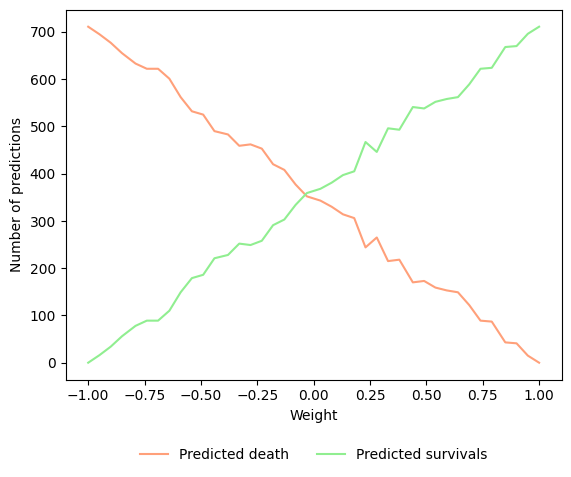

In [46]:
# Listing Plot the distribution of predictions
import matplotlib.pyplot as plt 
import matplotlib

# create a graph for the number of predicted deaths
deaths, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
    'lightsalmon',   # color of the graph
    label='Predicted death'
)

# create a graph for the number of predicted survivals
survivals, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
    'lightgreen', # color of the graph
    label = 'Predicted survivals'
)

plt.legend(handles=[deaths, survivals],loc='upper center',
           bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()